In [89]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import torch

i2t = "img_global_text_partial/IPOT_I2T/IPOT_alignment.pt"
t2i = "text_global_img_partial/IPOT_T2I/IPOT_alignment.pt"


<Figure size 640x480 with 0 Axes>

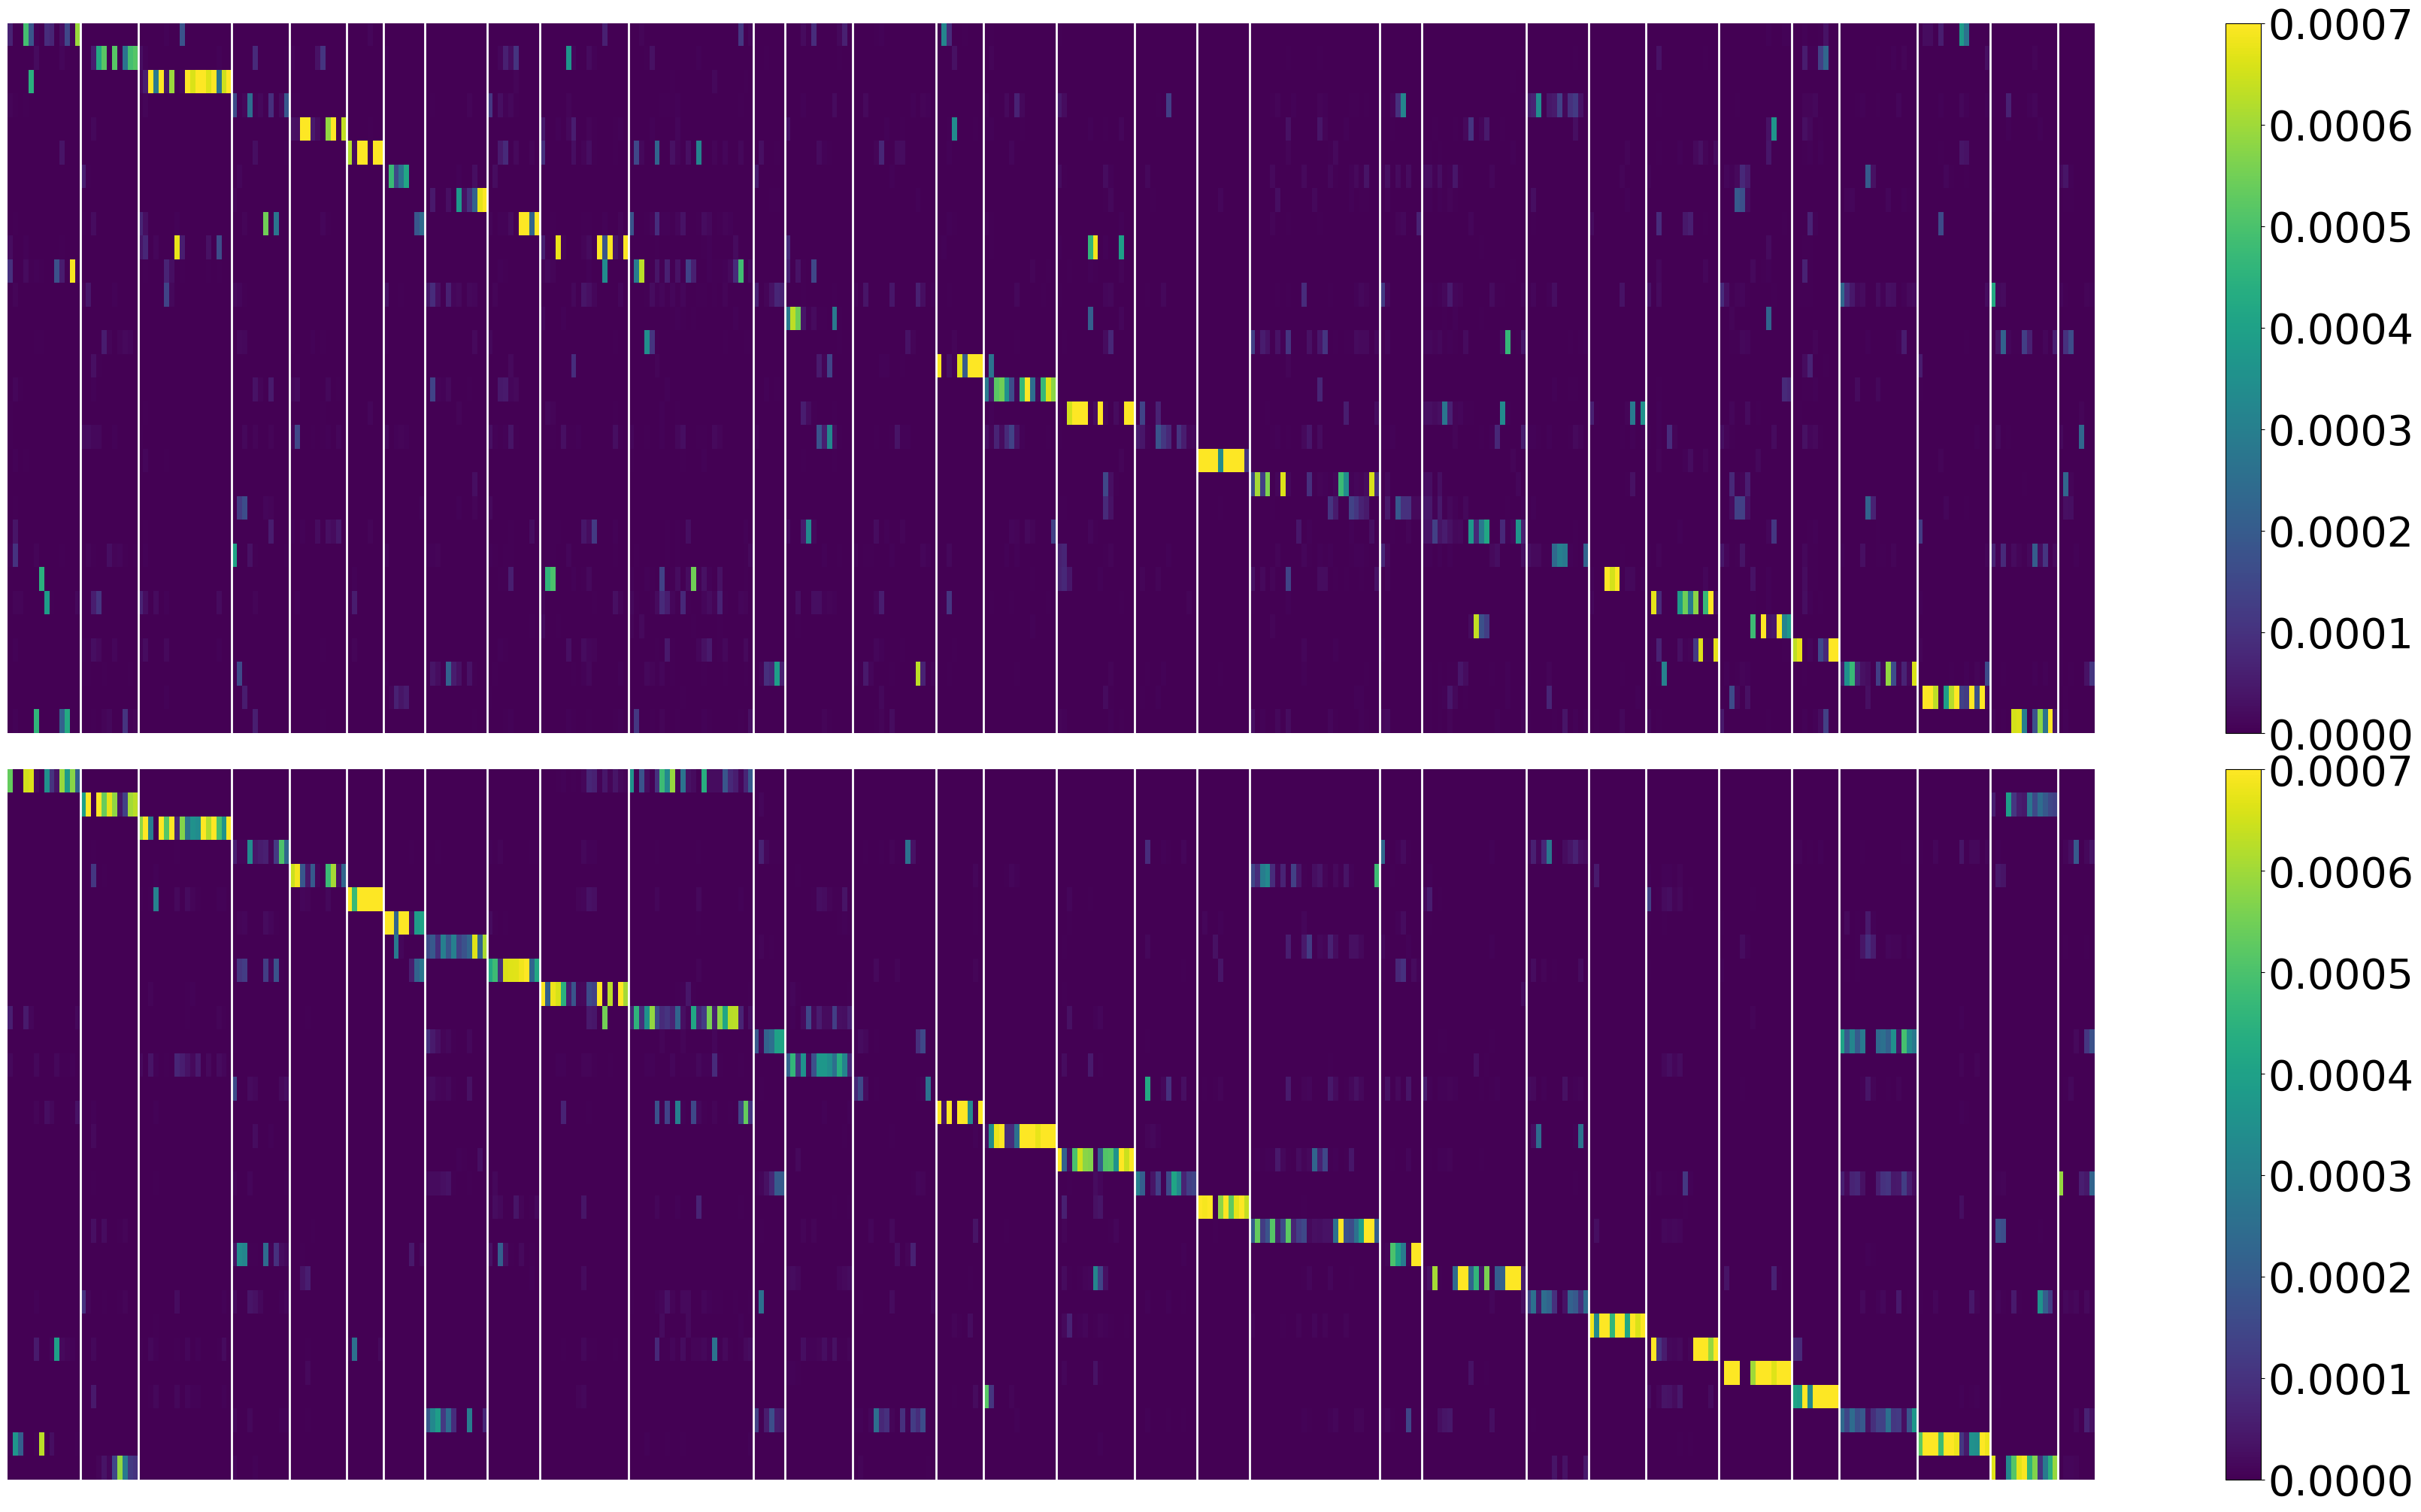

In [90]:
qr = [0, 30] # query range
dr = [0, 400] # db range
# qr = [0, 112] # query range
# dr = [0, 1300] # db range
fs = 40 # font size

plt.clf()
fig = plt.figure(figsize=(35,20))

state_dict = torch.load(i2t)
query_group_ids = state_dict["query_group_ids"]
db_group_ids = state_dict["db_group_ids"]
T = state_dict["T"]

u_ids = torch.unique(db_group_ids[dr[0]:dr[1]], return_counts=True)
end_ids = torch.cumsum(u_ids[1], 0)

src = [t.item() for t in db_group_ids[dr[0]:dr[1]]]
tgt = [t.item() for t in query_group_ids[qr[0]:qr[1]]]

ax1 = fig.add_subplot(2, 1, 1)
# ax1.set_xticks(np.arange(len(src)))
# ax1.set_yticks(np.arange(len(tgt)))
# ax1.set_xticklabels(src, fontsize=fs)
# ax1.set_yticklabels(tgt, fontsize=fs)
ax1.set_axis_off()

im = ax1.imshow(T[qr[0]:qr[1], dr[0]:dr[1]], aspect='auto', vmax=0.0007)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=fs)

for i in end_ids[:-1]:
    plt.axvline(x=i - 0.5, color='white', linestyle='-', linewidth=2)

state_dict2 = torch.load(t2i)
query_group_ids2 = state_dict2["query_group_ids"]
db_group_ids2 = state_dict2["db_group_ids"]
T2 = state_dict2["T"]

u_ids = torch.unique(db_group_ids[dr[0]:dr[1]], return_counts=True)
end_ids = torch.cumsum(u_ids[1], 0)

src2 = [t.item() for t in db_group_ids2[dr[0]:dr[1]]]
tgt2 = [t.item() for t in query_group_ids2[qr[0]:qr[1]]]

ax2 = fig.add_subplot(2, 1, 2)
# ax2.set_xticks(np.arange(len(src2)))
# ax2.set_yticks(np.arange(len(tgt2)))
# ax2.set_xticklabels(src2, fontsize=fs)
# ax2.set_yticklabels(tgt2, fontsize=fs)
ax2.set_axis_off()

im2 = ax2.imshow(T2[qr[0]:qr[1], dr[0]:dr[1]], aspect='auto', vmax=0.0007)
cbar = fig.colorbar(im2)
cbar.ax.tick_params(labelsize=fs)

for i in end_ids[:-1]:
    plt.axvline(x=i - 0.5, color='white', linestyle='-', linewidth=2)

fig.tight_layout()
plt.savefig("OT_visualization.pdf")